In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\anil rathod\appdata\local\programs\python\python312\lib\site-packages (2.2.0)




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Anil Rathod\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load dataset from CSV (replace with the path to your CSV file)
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")  # Path to your IMDB dataset file
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [5]:
df.shape

(50000, 2)

In [6]:
df.describe

<bound method NDFrame.describe of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [7]:
# Encode labels (positive = 1, negative = 0)
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])  # positive=1, negative=0

In [8]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [9]:
# Tokenize and pad the sequences
vocab_size = 10000
max_len = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [10]:
# Build the model
model = Sequential([
    Embedding(vocab_size, 32),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=512, validation_split=0.2, verbose=1)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5932 - loss: 0.6866 - val_accuracy: 0.7408 - val_loss: 0.6382
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7628 - loss: 0.6073 - val_accuracy: 0.8130 - val_loss: 0.5016
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8287 - loss: 0.4661 - val_accuracy: 0.8462 - val_loss: 0.3956
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8602 - loss: 0.3709 - val_accuracy: 0.8622 - val_loss: 0.3430
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8754 - loss: 0.3191 - val_accuracy: 0.8675 - val_loss: 0.3177
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8886 - loss: 0.2833 - val_accuracy: 0.8764 - val_loss: 0.2994
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8995 - loss: 0.2640 - val_accuracy: 0.8791 - val_loss: 0.2899
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9018 - loss: 0.2517 - val_accuracy: 0.8790 - v

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8856 - loss: 0.2730
Test Accuracy: 0.8881


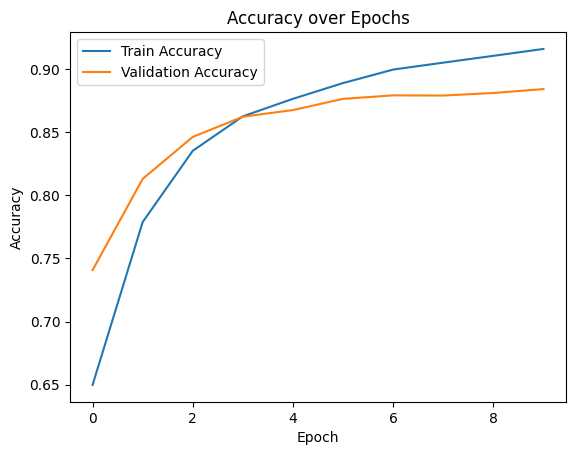

In [14]:
# Optional: Plot accuracy curve
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()